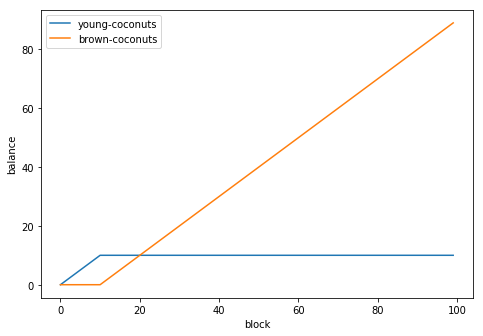

In [22]:
from matplotlib import pyplot as plt
import numpy as np
import math

%matplotlib inline


# Math helpers

def saturating_sub(a, b):
    c = a - b
    if c < 0:
        c = 0
    return c


# Model constants

COCONUTS_PER_BLOCK = 1
COCONUT_MATURATION_BLOCKS = 10


# Model functions

def baseline_coconuts(state, block_index):
    diff_block_index = block_index - state['init_block_index']
    coconuts_since_init = diff_block_index * state['coconut_tree_count'] * COCONUTS_PER_BLOCK
    baseline = state['snapshot_young_coconuts'] + coconuts_since_init
    return baseline

def young_coconut_balance(state, block_index):
    baseline = baseline_coconuts(state, block_index)
    brown_coconuts = brown_coconut_balance(state, block_index)
    coconuts = baseline - brown_coconuts
    return coconuts

def brown_coconut_balance(state, block_index):
    baseline = baseline_coconuts(state, block_index)
    coconuts = saturating_sub(baseline, COCONUT_MATURATION_BLOCKS)
    coconuts = coconuts * coconuts_per_block
    return coconuts


# Plotting

PLOT_BLOCKS = 100

def plot(state):

    x_start = state['init_block_index']
    x_end = state['init_block_index'] + PLOT_BLOCKS

    x = np.arange(x_start, x_end)

    baseline_coconuts_bound = lambda x: baseline_coconuts(state, x)
    young_coconut_balance_bound = lambda x: young_coconut_balance(state, x)
    brown_coconut_balance_bound = lambda x: brown_coconut_balance(state, x)

    y_baseline_coconuts = np.array(list(map(baseline_coconuts_bound, x)))
    y_young_coconut_balance = np.array(list(map(young_coconut_balance_bound, x)))
    y_brown_coconut_balance = np.array(list(map(brown_coconut_balance_bound, x)))

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    #ax.plot(x, y_baseline_coconuts, label="baseline-coconuts")
    ax.plot(x, y_young_coconut_balance, label="young-coconuts")
    ax.plot(x, y_brown_coconut_balance, label="brown-coconuts")
    ax.set_xlabel("block")
    ax.set_ylabel("balance")
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    
# Experiments
    
state = {
    'init_block_index': 0,
    'coconut_tree_count': 1,
    'snapshot_young_coconuts': 0,
}

plot(state)